In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel("Attrition (1).xlsx")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

in tnis data we have categorical and contious both columns present and 1470 rows and 35 columns in which 1 is target like attrition
and other are independent variables

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
#checking null values are there or not
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
#checkingthe uniqe value in each columns
for i in df.columns:
    print(df[i].unique(),df[i].dtypes)
    print(df[i].nunique(),'\n')
    

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] int64
43 

['Yes' 'No'] object
2 

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] object
3 

[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 

In [3]:
#seprating numerical and categorical columns

#checking categerical columns\
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]== "object":
        categorical_col.append(i)
print('categorical columns:',categorical_col)
print('\n')


#checking numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col)        

categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [4]:
# to  conver our target values tonumerical form
df['Attrition']= df['Attrition'].map({'Yes':1,'No':0})

In [7]:
# check the statistics of data
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


in thhis we see no nan value present so nice to proceed

there are somecolumns in which standard deviationd more than mean hence possibliyyto outlier present
we also check skewness of data and all other values is well manner
the mean value is greater than 50 percentile hence no issue to create in dataset and also meen is greater than std deviation
hence no need to worry about columns

In [17]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

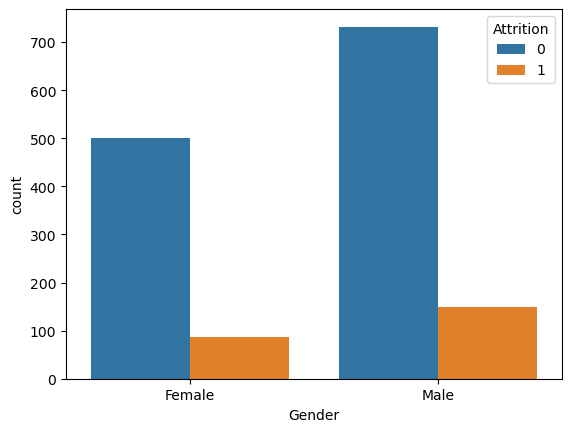

In [22]:
#checking the visiualization of features
sns.countplot(x='Gender',hue='Attrition',data=df)
plt.show()

wesee thaat high percent of attritionoccers in male candidate


In [23]:
#checking other columns to relationship with attrition

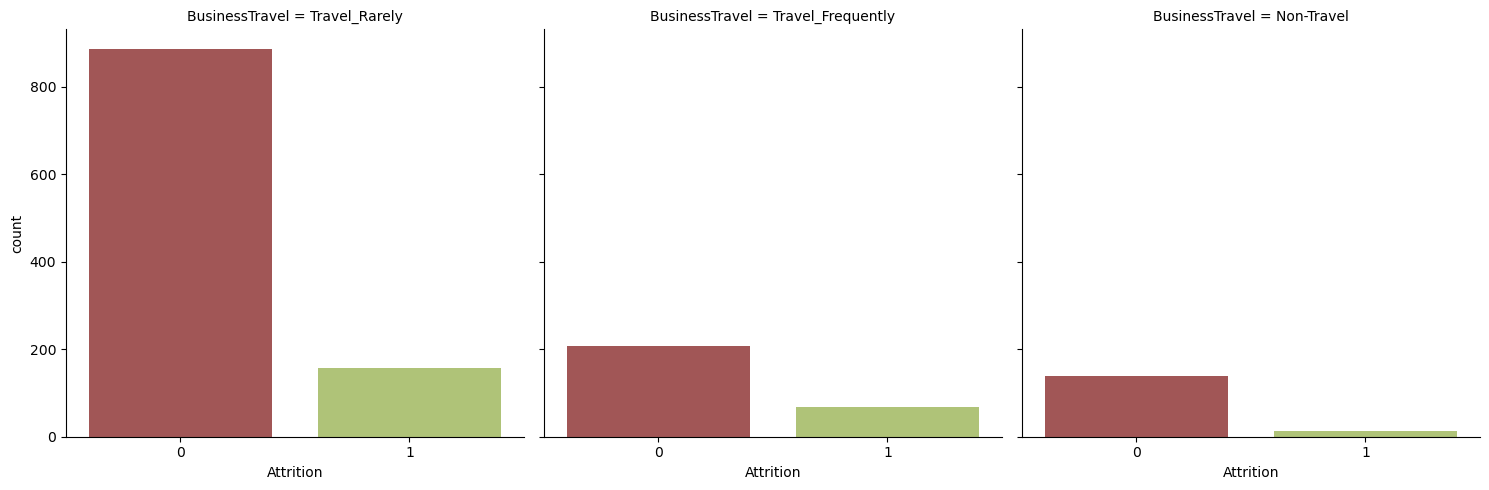

In [26]:
sns.catplot(x= 'Attrition', col= 'BusinessTravel', data=df, palette= 'tab20b_r', kind='count')

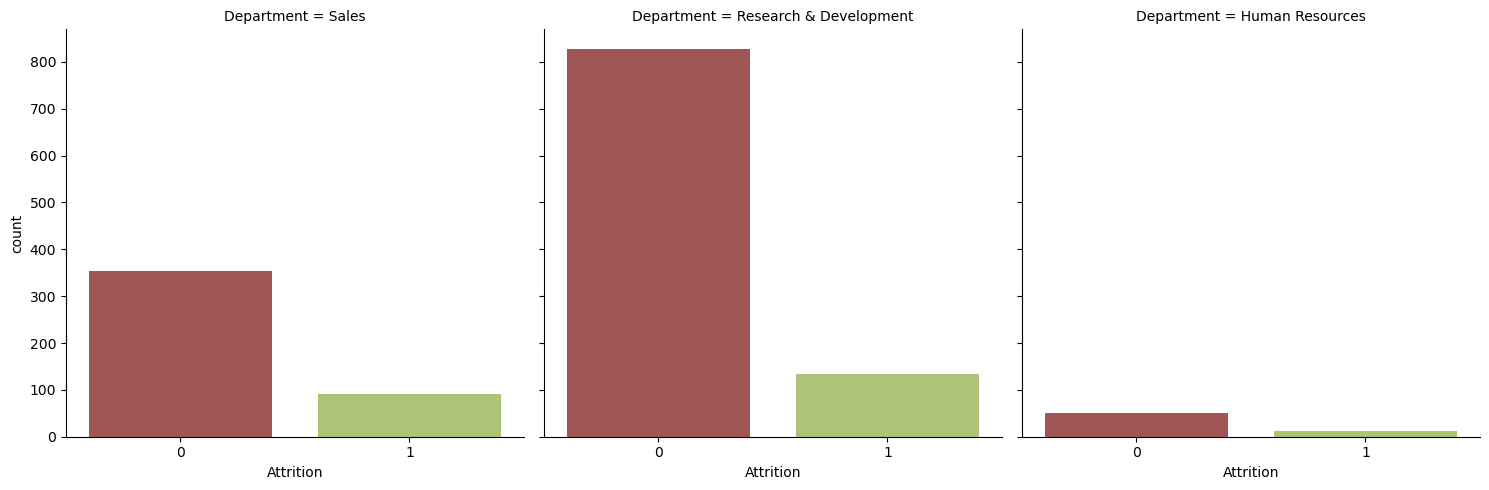

In [27]:
sns.catplot(x= 'Attrition', col= 'Department', data=df, palette= 'tab20b_r', kind='count')

the count is high in research and davlopment column highly contribute to attrition

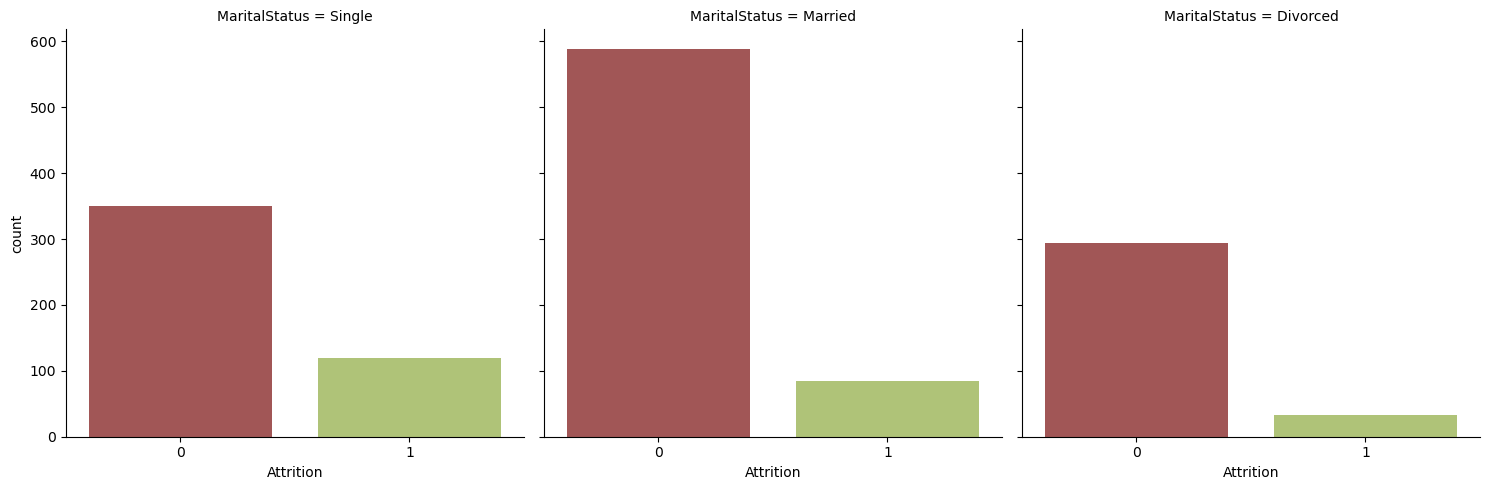

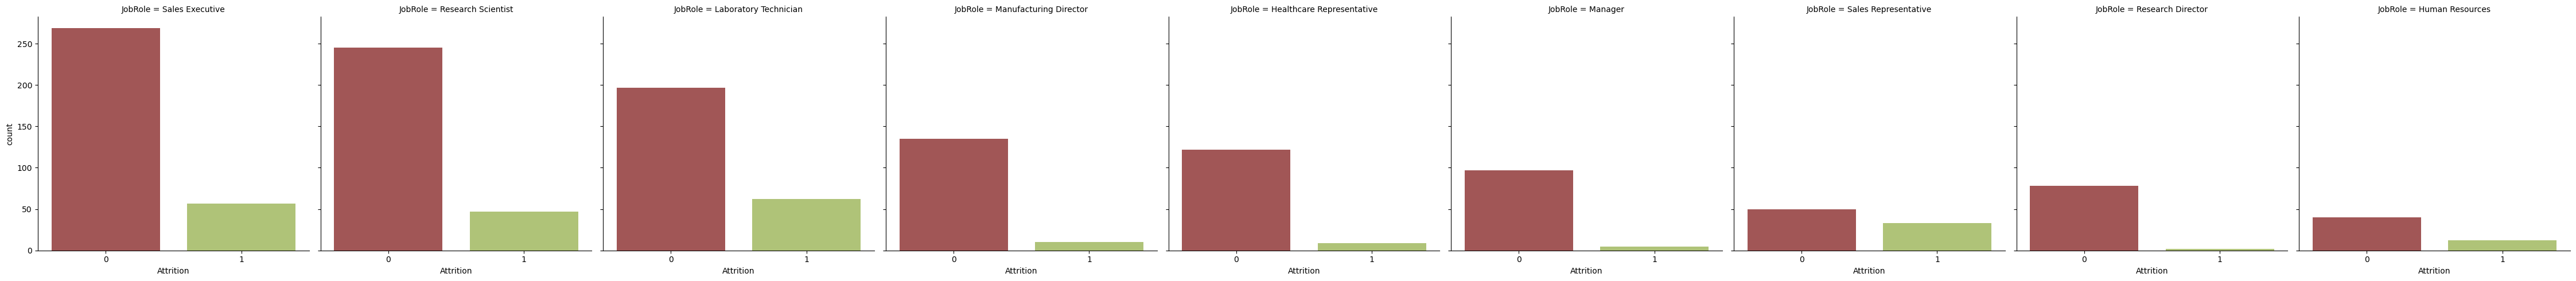

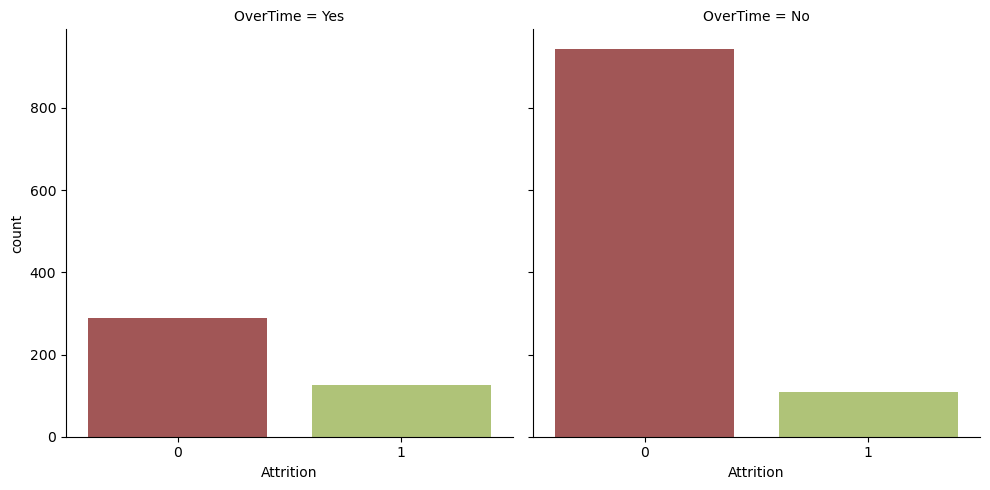

In [8]:
sns.catplot(x= 'Attrition', col= 'MaritalStatus', data=df, palette= 'tab20b_r', kind='count')
sns.catplot(x= 'Attrition', col= 'JobRole', data=df, palette= 'tab20b_r', kind='count')
sns.catplot(x= 'Attrition', col= 'OverTime', data=df, palette= 'tab20b_r', kind='count')

we see that above columns are not much contribute to atttrition which is more overtime on duty less chances of attrition

<Axes: xlabel='MonthlyIncome', ylabel='YearsInCurrentRole'>

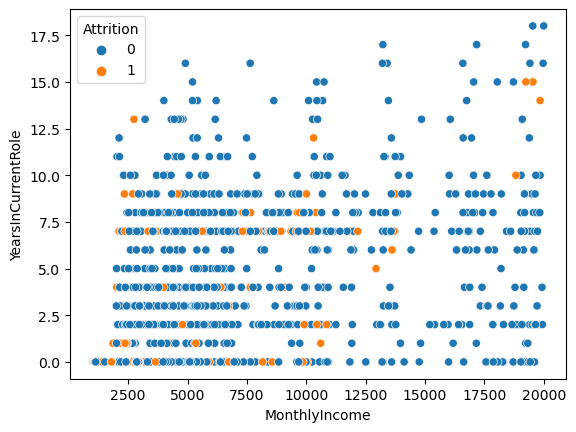

In [10]:
sns.scatterplot(x='MonthlyIncome',y='YearsInCurrentRole',data=df,hue='Attrition')

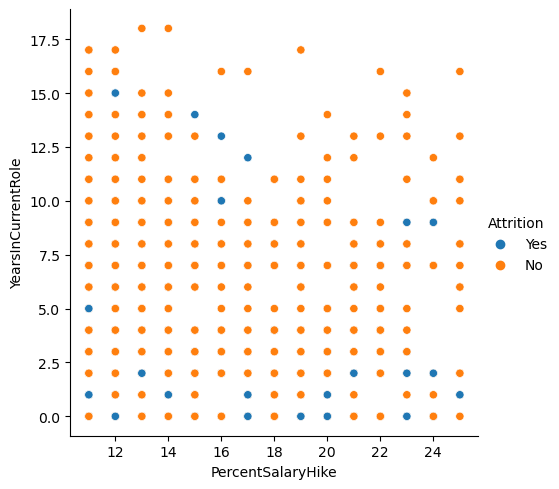

In [5]:
sns.relplot(x='PercentSalaryHike',y='YearsInCurrentRole',data=df,hue='Attrition')
plt.show()

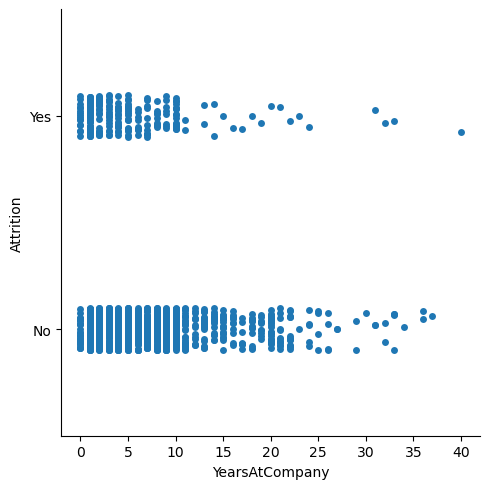

In [8]:
sns.catplot(x='YearsAtCompany',y='Attrition',data=df)
plt.show()

we see that lower yeers in company has minimum chances of attrition

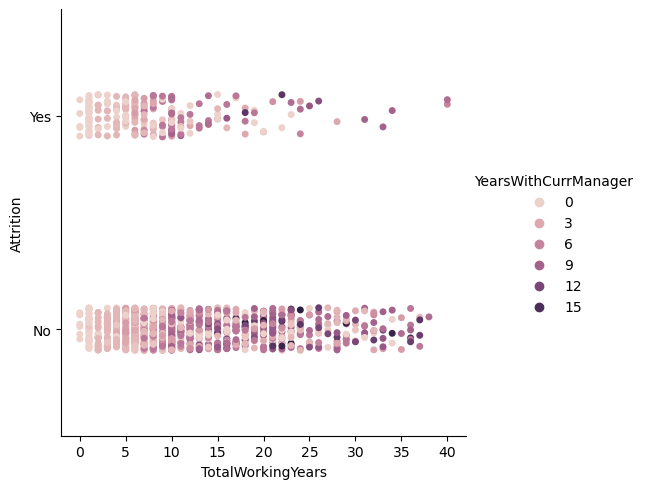

In [9]:
sns.catplot(x='TotalWorkingYears',y='Attrition',data=df,hue='YearsWithCurrManager')

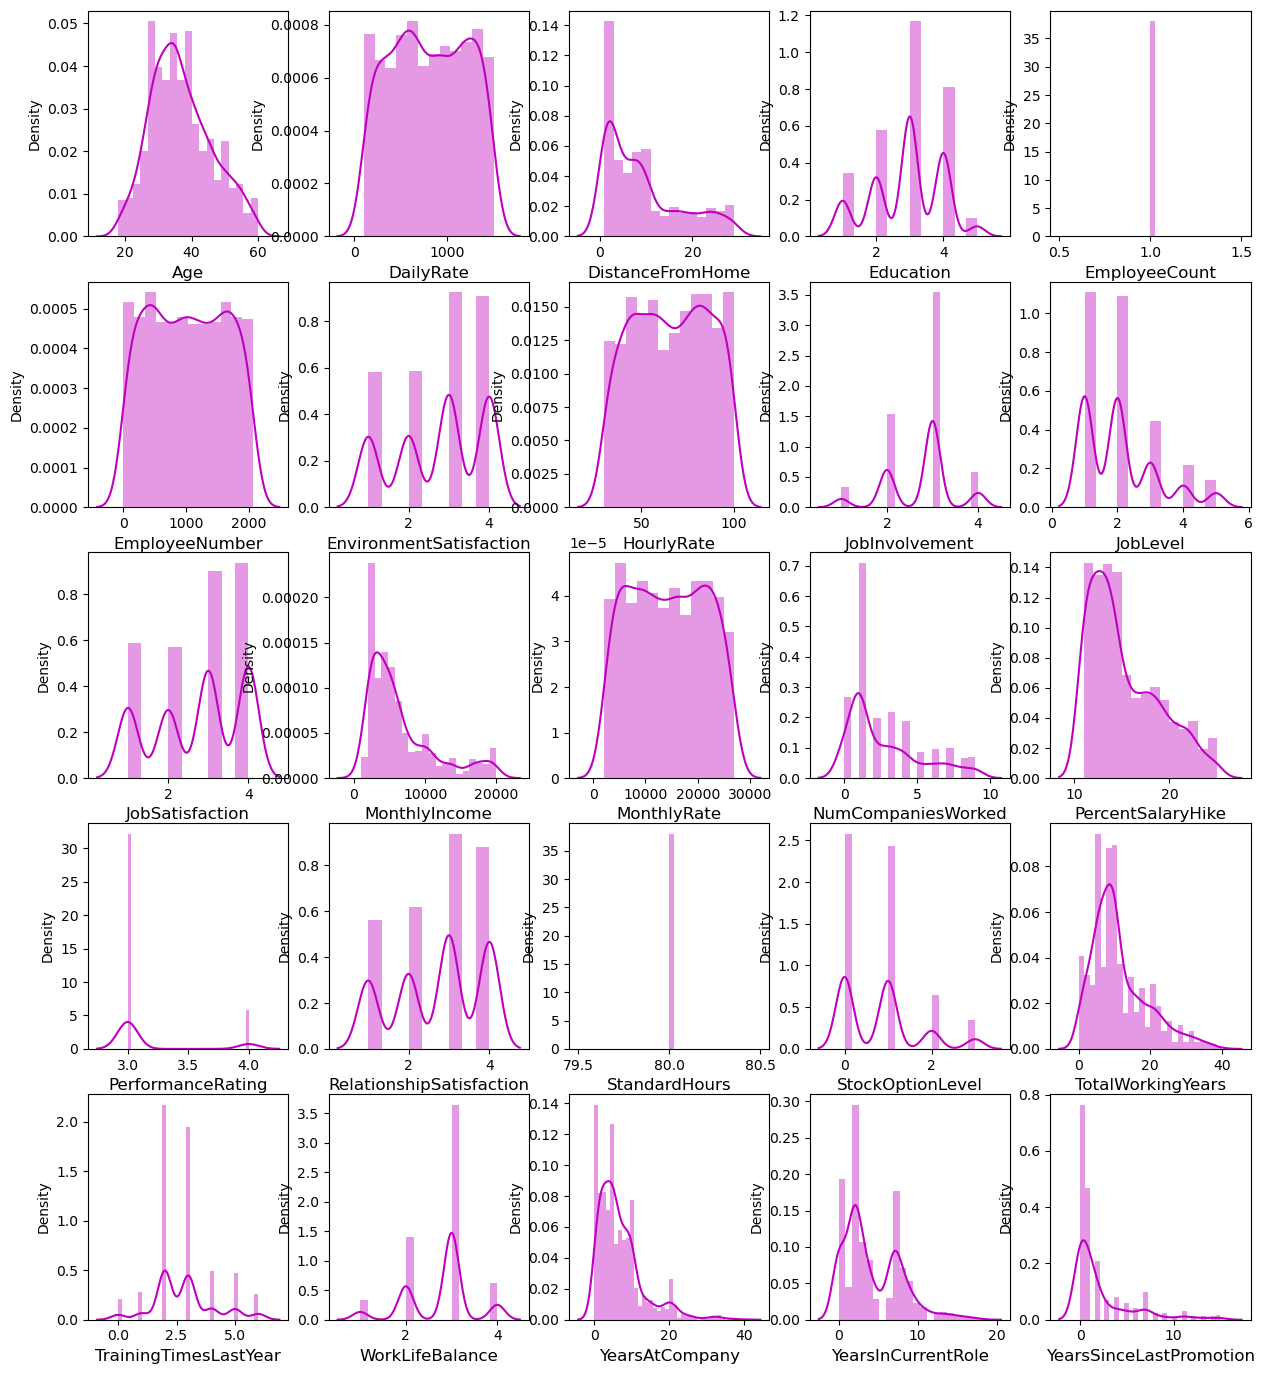

In [12]:
# now se checking the distribution of data in continuous columns
plt.figure(figsize=(15,17), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()  

in this data distribution is good but 2 and 3 columns are skewed hence checking the skewness of dataset

In [5]:
# we see that only onevalue is present in 3 columns in entire rows hence itsnot contribute to target hence drop this columns
df.drop(['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

In [6]:
#cheking skewness
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [7]:
#removibng skewness using cube root method
df['YearsSinceLastPromotion']= np.cbrt(df['YearsSinceLastPromotion'])
df['YearsAtCompany']= np.cbrt(df['YearsAtCompany'])
df['TotalWorkingYears']= np.cbrt(df['TotalWorkingYears'])
df['PerformanceRating']= np.cbrt(df['PerformanceRating'])
df['NumCompaniesWorked']= np.cbrt(df['NumCompaniesWorked'])
df['MonthlyIncome']= np.cbrt(df['MonthlyIncome'])
df['JobLevel']= np.cbrt(df['JobLevel'])
df['DistanceFromHome']= np.cbrt(df['DistanceFromHome'])


In [8]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.186998
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.460775
JobSatisfaction            -0.329672
MonthlyIncome               0.677032
MonthlyRate                 0.018578
NumCompaniesWorked         -0.699002
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears          -0.395296
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany             -0.367351
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     0.198634
YearsWithCurrManager        0.833451
dtype: float64

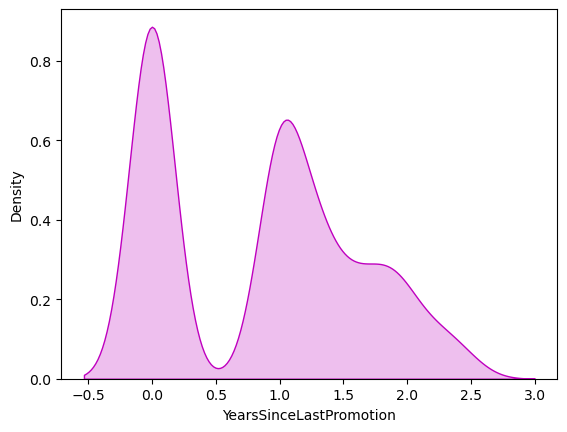

In [21]:
sns.distplot(df['YearsSinceLastPromotion'], color='m',hist=False,kde_kws= {'shade':True})
plt.show()

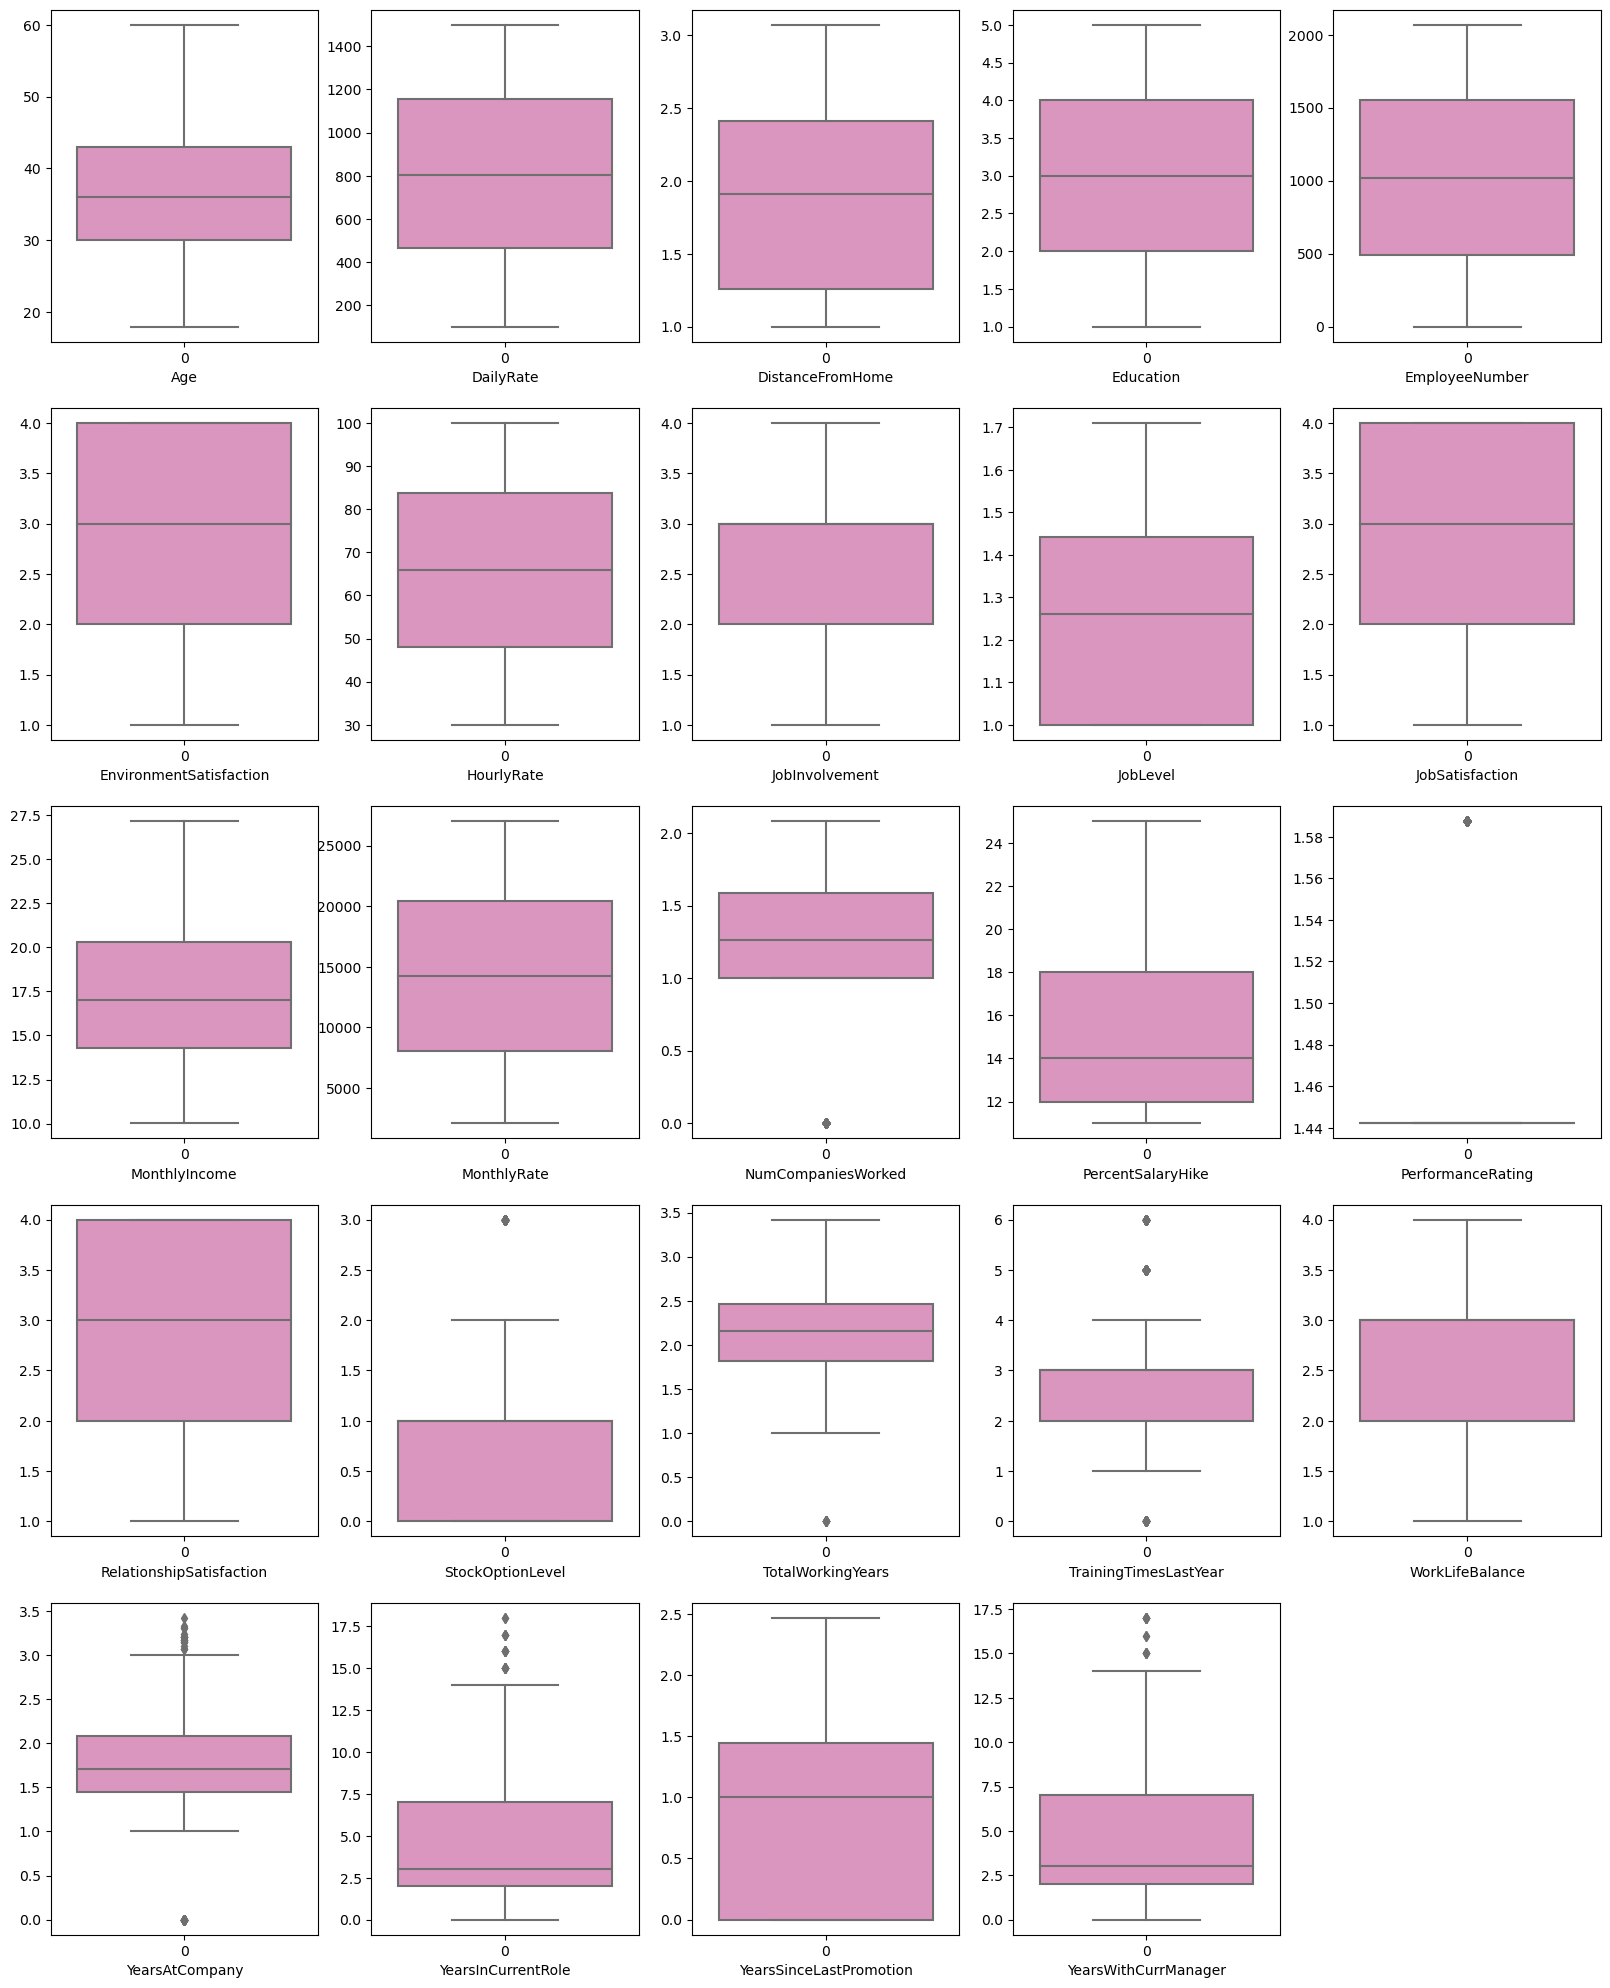

In [24]:
#lets check outlier by plot boxplot
plt.figure(figsize=(20,25))
p=1
for i in  numerical_col:
    if p<=25:
        plt.subplot(5,5,p)
        sns.boxplot(df[i], palette= 'Set2_r')
        plt.xlabel(i)
    p+=1
plt.show()    
    

In [9]:
from scipy.stats import zscore

out_features = df[['NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
                    'YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']]
z= np.abs(zscore(out_features))
z

,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,1.421071,0.426230,0.932014,0.204222,2.171982,0.127705,0.063296,0.245834
1,0.316213,2.346151,0.241988,0.076388,0.155707,0.703698,0.764998,0.806541
2,1.103357,0.426230,0.932014,0.362426,0.155707,2.975183,1.167687,1.155935
3,0.316213,0.426230,0.932014,0.204222,0.155707,0.439987,0.764998,1.155935
4,1.560199,0.426230,0.241988,0.536515,0.155707,0.823761,0.615492,0.595227
...,...,...,...,...,...,...,...,...
1465,0.704269,0.426230,0.241988,0.833802,0.155707,0.055254,0.615492,0.314873
1466,0.704269,0.426230,0.241988,0.058709,1.707500,0.291310,0.764998,0.806541
1467,0.316213,2.346151,0.241988,0.536515,2.171982,0.127705,0.615492,0.314873
1468,0.135344,0.426230,0.932014,0.833802,0.155707,0.576737,0.488900,1.086895


In [10]:
#threshold=3
np.where(z>3)

(array([  23,   28,   63,  123,  123,  127,  153,  187,  190,  231,  231,
         281,  296,  301,  386,  457,  466,  561,  615,  616,  635,  686,
         716,  727,  746,  828,  875,  926,  972,  976, 1024, 1078, 1153,
        1311, 1327, 1348, 1351, 1430], dtype=int64),
 array([3, 7, 6, 6, 7, 3, 7, 7, 6, 6, 7, 6, 3, 3, 7, 3, 6, 7, 3, 7, 7, 7,
        6, 3, 6, 3, 7, 7, 3, 6, 6, 7, 3, 3, 6, 7, 6, 6], dtype=int64))

In [11]:
# now removing data above zscore and creating new dataframe
df1 = df[(z<3).all(axis=1)]
df1.shape

(1434, 32)

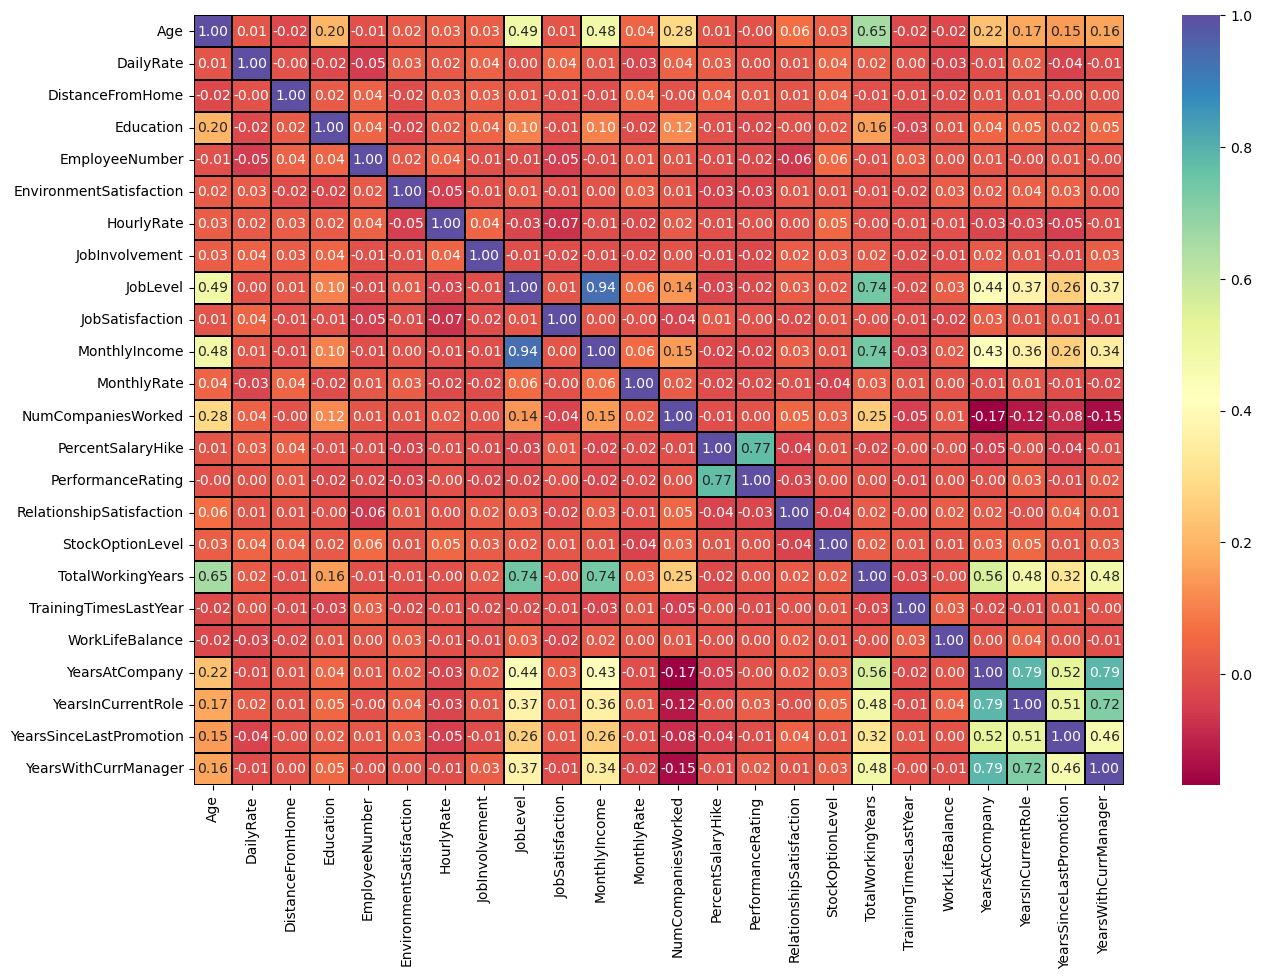

In [29]:
# thenwe checkthe coorelation between target and dependent variables
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), linewidths = 0.2, fmt = '.2f', linecolor= 'black', annot = True, cmap = 'Spectral')
plt.show()

we see that few columnesare more positive correlation with target and few are negative correlated hence there all columns are
more chnces to contributing to target therefore we build model with given all features

In [30]:
df1.shape

(1434, 32)

In [33]:
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [17]:
#lets encoding categorical data to numeric one using one hot encoding
df_encode= pd.get_dummies(df1[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus',
                              'OverTime']],drop_first=True)
df_encode
    

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1466,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1467,0,1,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,1
1468,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [19]:
df2=pd.concat([df1,df_encode],axis=1)
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,Travel_Rarely,1102,Sales,1.000000,2,Life Sciences,1,2,...,0,0,0,0,0,1,0,0,1,1
1,49,0,Travel_Frequently,279,Research & Development,2.000000,1,Life Sciences,2,3,...,0,0,0,0,1,0,0,1,0,0
2,37,1,Travel_Rarely,1373,Research & Development,1.259921,2,Other,4,4,...,1,0,0,0,0,0,0,0,1,1
3,33,0,Travel_Frequently,1392,Research & Development,1.442250,4,Life Sciences,5,4,...,0,0,0,0,1,0,0,1,0,1
4,27,0,Travel_Rarely,591,Research & Development,1.259921,1,Medical,7,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,2.843867,2,Medical,2061,3,...,1,0,0,0,0,0,0,1,0,0
1466,39,0,Travel_Rarely,613,Research & Development,1.817121,1,Medical,2062,4,...,0,0,0,0,0,0,0,1,0,0
1467,27,0,Travel_Rarely,155,Research & Development,1.587401,3,Life Sciences,2064,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,0,Travel_Frequently,1023,Sales,1.259921,3,Medical,2065,4,...,0,0,0,0,0,1,0,1,0,0


In [20]:
#after encode we have remove the columns which have to be encoded
df2.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus',
                              'OverTime'],axis=1,inplace=True)
df2.shape


(1434, 46)

In [21]:
# lets seperate the features and target variables
x = df2.drop('Attrition',axis=1)
y = df2['Attrition']

print(x.shape)
print(y.shape)

(1434, 45)
(1434,)


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x)
x.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1.000000,2,1,2,94,3,1.259921,4,...,0,0,0,0,0,1,0,0,1,1
1,49,279,2.000000,1,2,3,61,2,1.259921,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,1.259921,2,4,4,92,2,1.000000,3,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,1.442250,4,5,4,56,3,1.000000,3,...,0,0,0,0,1,0,0,1,0,1
4,27,591,1.259921,1,7,1,40,3,1.000000,2,...,1,0,0,0,0,0,0,1,0,0


In [23]:
# now initialize model building

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [26]:
maxaccu = 0
maxrs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= i)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu = acc
        maxrs = i
print('best accuracy is', maxaccu, 'at random state', maxrs)        

best accuracy is 0.8793503480278422 at random state 113


In [27]:
#creating train test split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= maxrs)

In [28]:
gbt = GradientBoostingClassifier() 
gbt.fit(x_train,y_train)
predgbt = gbt.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predgbt))
print('confusion matrix :\n',confusion_matrix(y_test,predgbt))
print('classification report :\n',classification_report(y_test,predgbt))

accracy_score :
 0.8909512761020881
confusion matrix :
 [[362  10]
 [ 37  22]]
classification report :
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       372
           1       0.69      0.37      0.48        59

    accuracy                           0.89       431
   macro avg       0.80      0.67      0.71       431
weighted avg       0.88      0.89      0.88       431



In [29]:
rfc =  RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8816705336426914
[[371   1]
 [ 50   9]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       372
           1       0.90      0.15      0.26        59

    accuracy                           0.88       431
   macro avg       0.89      0.57      0.60       431
weighted avg       0.88      0.88      0.84       431



In [30]:
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,predknn))
print('confusion matrix :\n',confusion_matrix(y_test,predknn))
print('classification report :\n',classification_report(y_test,predknn))

accracy_score :
 0.8213457076566125
confusion matrix :
 [[351  21]
 [ 56   3]]
classification report :
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       372
           1       0.12      0.05      0.07        59

    accuracy                           0.82       431
   macro avg       0.49      0.50      0.49       431
weighted avg       0.76      0.82      0.79       431



In [31]:
dtm = DecisionTreeClassifier()
dtm.fit(x_train,y_train)
preddtm= dtm.predict(x_test)
print('accracy_score :\n',accuracy_score(y_test,preddtm))
print('confusion matrix :\n',confusion_matrix(y_test,preddtm))
print('classification report :\n',classification_report(y_test,preddtm))

accracy_score :
 0.802784222737819
confusion matrix :
 [[318  54]
 [ 31  28]]
classification report :
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       372
           1       0.34      0.47      0.40        59

    accuracy                           0.80       431
   macro avg       0.63      0.66      0.64       431
weighted avg       0.83      0.80      0.82       431



wesee that accuracy score is 89 percent in gradient boosting model which is hiher than other model 

In [32]:
#lets checking crooss validation across models

score= cross_val_score(gbt,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.85017422 0.86759582 0.87108014 0.87456446 0.86013986]
mean : 0.8647108988572404


In [35]:
score= cross_val_score(lr,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.83623693 0.84320557 0.83972125 0.83972125 0.83916084]
mean : 0.8396091713164884


In [36]:
score= cross_val_score(rfc,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.84320557 0.85365854 0.86759582 0.85714286 0.86013986]
mean : 0.8563485295192613


In [37]:
score= cross_val_score(dtm,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.7804878  0.76655052 0.82578397 0.77003484 0.78321678]
mean : 0.7852147852147853


In [38]:
score= cross_val_score(knn,x,y,cv=5)
print(score)
print('mean :',score.mean())

[0.82578397 0.82229965 0.81184669 0.79094077 0.83566434]
mean : 0.8173070831607416


we see that after cross validation check we have gain hiher accracy in gradient boosting model hence proceedwith this model 
and create hyperperameter tuning on this to achive more accracy

In [39]:
from sklearn .model_selection import GridSearchCV

In [42]:
params = {'n_estimators':[10,50,100], 'max_leaf_nodes':[10,15,20],'min_samples_split':[8,5,10]}

In [43]:
search_cv= GridSearchCV(GradientBoostingClassifier(),params)
search_cv.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_leaf_nodes': [10, 15, 20],
                         'min_samples_split': [8, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [44]:
search_cv.best_params_

{'max_leaf_nodes': 10, 'min_samples_split': 5, 'n_estimators': 100}

In [46]:
final_model = GradientBoostingClassifier(n_estimators=100,max_leaf_nodes=10,min_samples_split=5)
final_model.fit(x_train,y_train)
pred1 = final_model.predict(x_test)
acc = accuracy_score(y_test,pred1)
print('accuracy to our final model :\n',acc)

accuracy to our final model :
 0.8932714617169374


after hyper tuning the accuracy of our model increases therefore we hve finalize this model to prediction

In [47]:
# lets checking the roc auc graph for performance ofmodel
from sklearn import metrics
from sklearn.metrics import roc_auc_score


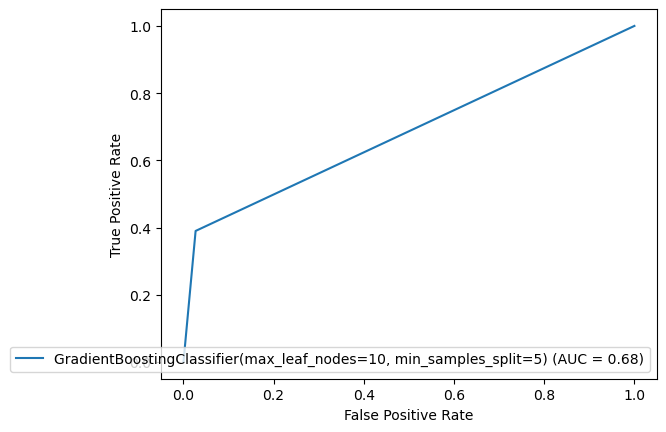

In [48]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred1)
roc_auc= metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc= roc_auc, estimator_name= final_model)
display.plot()